In [1]:
import os
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import SimpleITK as sitk

In [2]:
ELASTIX_PATH = os.path.join('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe')
TRANSFORMIX_PATH = os.path.join('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/transformix.exe')
if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if os.path.exists('results') is False:
    os.mkdir('results')
    
if os.path.exists('results1') is False:
    os.mkdir('results1')

In [3]:
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Affine registration

In [8]:
fixed_image_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/mr_bffe.mhd'
moving_image_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p107/mr_bffe.mhd'
parameter_file_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_affine.txt'


In [9]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path],
    output_dir='results')

C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe -f C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/mr_bffe.mhd -m C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p107/mr_bffe.mhd -p C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_affine.txt -out results


In [10]:
result_path_affine = os.path.join('results', 'result.0.mhd')

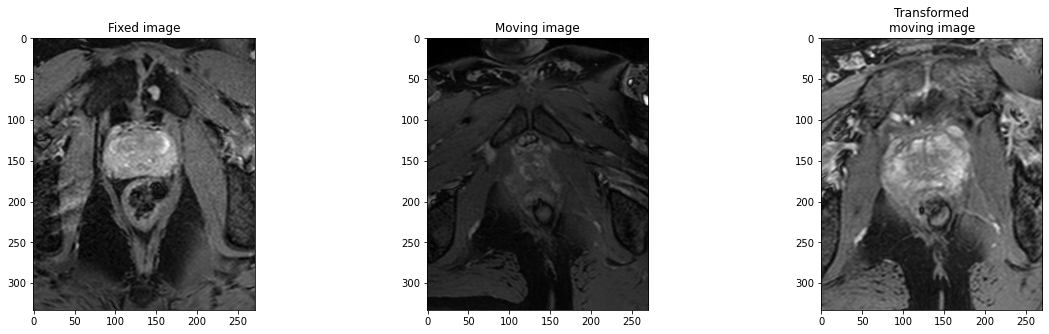

In [11]:
fixed_image = imageio.imread(fixed_image_path)[40,:,:]
moving_image = imageio.imread(moving_image_path)[40,:,:]
transformed_moving_image = imageio.imread(result_path_affine)[40,:,:]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()

# Bspline registration

In [12]:
parameter_file_path_bspline = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_bspline.txt'
el.register(
    fixed_image=fixed_image_path,
    moving_image=result_path_affine,
    parameters=[parameter_file_path_bspline],
    output_dir='results1')

C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe -f C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/mr_bffe.mhd -m results\result.0.mhd -p C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_bspline.txt -out results1


In [13]:
result_path = os.path.join('results1', 'result.0.mhd')

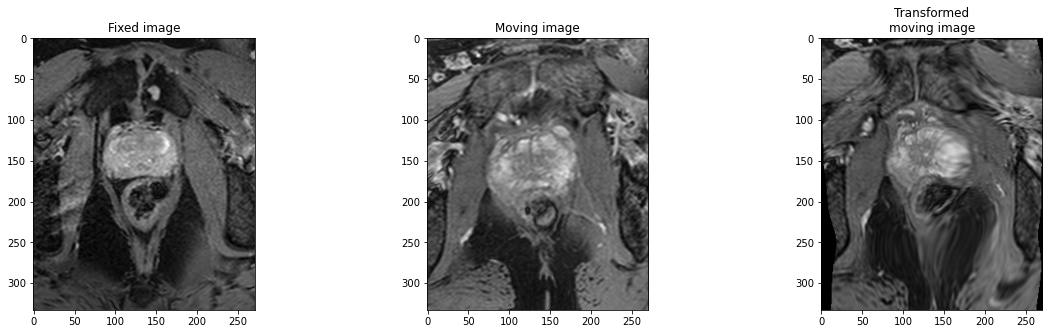

In [15]:
fixed_image = imageio.imread(fixed_image_path)[40,:,:]
moving_image = imageio.imread(result_path_affine)[40,:,:]
transformed_moving_image = imageio.imread(result_path)[40,:,:]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()

# Transformation

Make sure that you manually change the FinalBSplineInterpolationOrder to 0 in the TransFormParameters.0.txt file

In [20]:
moving_image_path_new = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p107/prostaat.mhd'
# Make a new transformix object tr with the CORRECT PATH to transformix
tr =elastix.TransformixInterface(parameters='results/TransformParameters.0.txt',
transformix_path=TRANSFORMIX_PATH)
transformed_image_path = tr.transform_image(moving_image_path_new, output_dir=r'results')


tr_2 =elastix.TransformixInterface(parameters='results1/TransformParameters.0.txt',
transformix_path=TRANSFORMIX_PATH)
transformed_image_path_2 = tr_2.transform_image(transformed_image_path, output_dir=r'results1')

transformed_moving_image_new= imageio.imread(transformed_image_path_2.replace('dcm', 'tiff'))[40,:,:]

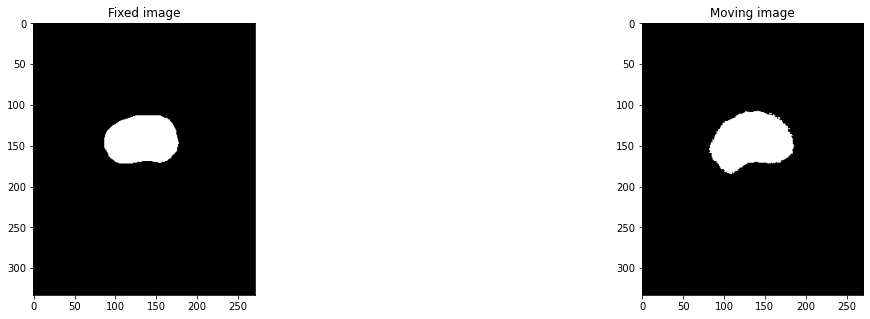

In [21]:
fixed_image_path_new = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p102/prostaat.mhd'
fixed_image_new = imageio.imread(fixed_image_path_new)[40,:,:]
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(fixed_image_new, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(transformed_moving_image_new, cmap='gray')
ax[1].set_title('Moving image')
plt.show()